In [39]:
# %matplotlib widget

import numpy as np
import matplotlib.animation
import matplotlib.pyplot as plt
import c3d
import sys

# sys.path.append('/home/schiavazza/code/hpe/')

sys.path.append('/home/cpham-iit.local/hpe-core/datasets/')

from vicon_processing.src.projection import ProjectionHelper
from vicon_processing.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_processing.src import vis_utils, utils

In [40]:
file_path = '/home/cpham-iit.local/data/hpe/vicon_recordings/zhichao/vicon/box_s1.c3d'

In [42]:
reader = c3d.Reader(open(file_path, 'rb'))
for i, points, analog in reader.read_frames():
    print(points.shape)
    break

(157, 5)


In [43]:
print(reader.header)

                  parameter_block: 2
                      point_count: 157
                     analog_count: 0
                      first_frame: 1
                       last_frame: 1658
                          max_gap: 0
                     scale_factor: -0.009999999776482582
                       data_block: 48
                 analog_per_frame: 0
                       frame_rate: 100.0
                long_event_labels: True
                      event_block: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [44]:
print(reader.point_labels)

['camera:cam_right              ' 'camera:cam_back               '
 'camera:cam_left               ' 'P10:LFHD                      '
 'P10:RFHD                      ' 'P10:LBHD                      '
 'P10:RBHD                      ' 'P10:C7                        '
 'P10:CLAV                      ' 'P10:STRN                      '
 'P10:RBAK                      ' 'P10:LSHO                      '
 'P10:LUPA                      ' 'P10:LELB                      '
 'P10:LFRM                      ' 'P10:LWRA                      '
 'P10:LWRB                      ' 'P10:LFIN                      '
 'P10:RSHO                      ' 'P10:RUPA                      '
 'P10:RELB                      ' 'P10:RFRM                      '
 'P10:RWRA                      ' 'P10:RWRB                      '
 'P10:RFIN                      ' 'P10:LASI                      '
 'P10:RASI                      ' 'P10:LPSI                      '
 'P10:RPSI                      ' 'P10:LTHI                   

In [45]:
len(reader.point_labels)

157

In [46]:
# low_joints_labels = [
#     'P10:RASI',
#     'P10:LASI',
#     'P10:STRN',
#     'P10:CLAV',
#     'P10:RFHD',
#     'P10:LFHD',
#     'P10:LSHO',
#     'P10:RSHO',
# ]
low_joints_labels = [
    'P10:LHJC',
    'P10:RHJC',
    'P10:LKJC',
    'P10:RKJC',
    'P10:LAJC',
    'P10:RAJC',
    'P10:LSJC',
    'P10:RSJC',
    'P10:LEJC',
    'P10:REJC',
    'P10:LWJC',
    'P10:RWJC',
]
joint_ids = [i for i, l in enumerate(reader.point_labels) if l.strip() in low_joints_labels]

In [48]:
frame_list = []

for i, points, analog in reader.read_frames():
    # print('frame {}: point {}, analog {}'.format(
    #     i, points.shape, analog.shape))
    
    frame_list.append(points)

In [49]:
frame_list = np.array(frame_list)
frame_list.shape

sub_frames = frame_list[:, [joint_ids]][:, 0, :, :]

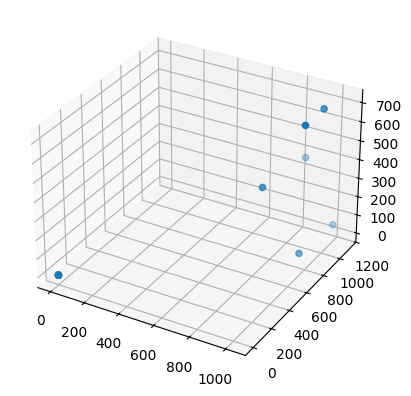

In [51]:
fig = plt.figure()
ax = plt.axes(projection='3d')

def update(n):
    # skel._offsets3d = (frame_list[n][:, 0], frame_list[n][:, 1], frame_list[n][:, 2])
    skel._offsets3d = (sub_frames[n][:, 0], sub_frames[n][:, 1], sub_frames[n][:, 2])
    # points._offsets3d = (sub_frames[n][:, 0], sub_frames[n][:, 1], sub_frames[n][:, 2])

skel = ax.scatter(sub_frames[0][:, 0], sub_frames[0][:, 1], sub_frames[0][:, 2])

# points = ax.scatter(sub_frames[0][:, 0], sub_frames[0][:, 1], sub_frames[0][:, 2], c='red', marker='^')

ani = matplotlib.animation.FuncAnimation(fig, update, sub_frames.shape[0], 
                               interval=40, blit=False)

plt.show()

In [52]:
sub_frames.shape

(1658, 12, 5)

In [53]:
frame_list.shape

(1658, 157, 5)

In [54]:
for i, points, analog in reader.read_frames():
    print('frame {}: point {}, analog {}'.format(
        i, points.shape, analog.shape))

frame 1: point (157, 5), analog (0,)
frame 2: point (157, 5), analog (0,)
frame 3: point (157, 5), analog (0,)
frame 4: point (157, 5), analog (0,)
frame 5: point (157, 5), analog (0,)
frame 6: point (157, 5), analog (0,)
frame 7: point (157, 5), analog (0,)
frame 8: point (157, 5), analog (0,)
frame 9: point (157, 5), analog (0,)
frame 10: point (157, 5), analog (0,)
frame 11: point (157, 5), analog (0,)
frame 12: point (157, 5), analog (0,)
frame 13: point (157, 5), analog (0,)
frame 14: point (157, 5), analog (0,)
frame 15: point (157, 5), analog (0,)
frame 16: point (157, 5), analog (0,)
frame 17: point (157, 5), analog (0,)
frame 18: point (157, 5), analog (0,)
frame 19: point (157, 5), analog (0,)
frame 20: point (157, 5), analog (0,)
frame 21: point (157, 5), analog (0,)
frame 22: point (157, 5), analog (0,)
frame 23: point (157, 5), analog (0,)
frame 24: point (157, 5), analog (0,)
frame 25: point (157, 5), analog (0,)
frame 26: point (157, 5), analog (0,)
frame 27: point (157,

In [55]:
n_points= []

for i, points, analog in reader.read_frames():
    valid_points = points[points[:, 0] > 0.0]
    n_points.append(valid_points.shape[0])

In [56]:
helper = C3dHelper(file_path)

/home/cpham-iit.local/v_env/vicon/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


In [57]:
helper.calculate_frame_times()

array([0.00000000e+00, 1.00060350e-02, 2.00120700e-02, ...,
       1.65599879e+01, 1.65699940e+01, 1.65800000e+01])